In [41]:
from statsmodels.formula.api import ols
import pandas as pd
import statsmodels.api as sm

data = pd.read_csv('deflection.csv', sep=';')

model = ols('Deflection ~ Load', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Deflection   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.310e+06
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.77e-95
Time:                        16:00:47   Log-Likelihood:                 189.57
No. Observations:                  40   AIC:                            -375.1
Df Residuals:                      38   BIC:                            -371.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0061      0.001      8.623      0.000       0.005       0.008
Load        7.221e-07   3.97e-10   1819.289      0.000    7.21e-07    7.23e-07
==============================================================================
Omnibus:                        5.525   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.146
Skew:                          -0.657   Prob(JB):                        0.126
Kurtosis:                       2.126   Cond. No.                     3.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

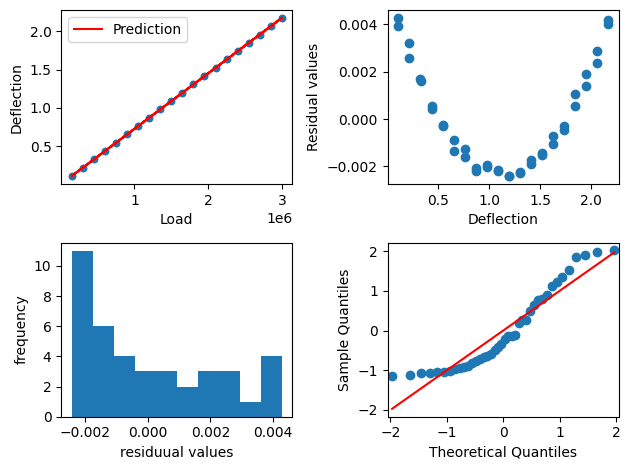

In [42]:
import statsmodels.graphics.gofplots as sm
import matplotlib.pyplot as plt 
from scipy import stats

fig, axs = plt.subplots(2,2, squeeze=False)
data['Prediction'] = res.predict(data)
plt.tight_layout()

ax = data.plot.scatter(x='Load',y='Deflection', ax=axs[0,0])
data.plot(x='Load',y='Prediction', ax=axs[0,0], color='red')
# plt.subplot(2,2,2)
residuals = res.predict(data)-data['Deflection']
axs[0,1].scatter(data['Deflection'], (residuals))
axs[0,1].set_xlabel('Deflection')
axs[0,1].set_ylabel('Residual values')

axs[1,0].hist(residuals)
axs[1,0].set_ylabel('frequency')
axs[1,0].set_xlabel('residuual values')
plt.subplot(2,2,4)
sm.qqplot(residuals, stats.t, distargs=(4,), loc=3, scale=10, fit=True, ax=axs[1,1], line='s')
plt.tight_layout()

# Poprawa modelu 
Przeanalizuj wyniki i sprawdź jak rozszerzenie modelu wpłynęło na wartości statytsyk, wartości parametrów modelu oraz na przedział ufności poszczególnych parametrów. Szczególną uwagę zwróć na Omnibus test.

In [43]:
data['Load2'] = data['Load']**2
model = ols('Deflection ~ Load + Load2', data=data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Deflection   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.853e+08
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.06e-130
Time:                        16:00:49   Log-Likelihood:                 284.47
No. Observations:                  40   AIC:                            -562.9
Df Residuals:                      37   BIC:                            -557.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0007      0.000      6.240      0.0

Porównanie: \
Poprzednio R-kwadrat: 1.000 - Wskazuje na idealne dopasowanie. \
Po poprawie R-kwadrat: 1.000 - Nadal wskazuje na idealne dopasowanie. \

Poprzednio Statystyka F: 3.310e+06 - Wysoka wartość sugeruje istotność modelu. \
Po poprawie Statystyka F: 1.853e+08 - Znacznie wyższa wartość statystyki F, sugerująca, że rozszerzony model jest jeszcze bardziej istotny. \

Poprzednio P-wartość (Statystyka F): 1.77e-95 - Bardzo niska p-wartość sugeruje istotność modelu. \
Po poprawie P-wartość (Statystyka F): 3.06e-130 - Bardzo niska p-wartość, wskazująca na ogólną istotność modelu. \

Poprzednio Omnibus: 5.525 - Test Omnibus jest istotny, sugerując potencjalne problemy z normalnością reszt. \
Po poprawie Omnibus: 0.133 - Test Omnibus nie jest istotny, co wskazuje na poprawę normalności reszt w rozszerzonym modelu. \

Test Omnibus sprawdza, czy reszty (różnice między wartościami przewidywanymi a rzeczywistymi) w modelu są rozłożone normalnie. Po dodaniu dodatkowego elementu do modelu (w tym przypadku kwadratowej zmiennej), reszty bardziej przypominają kształt krzywej dzwonowej, czyli są bliższe idealnemu rozkładowi normalnemu.

W skrócie, poprawa Testu Omnibus oznacza, że reszty w nowym modelu są bardziej "normalne" lub przewidujące wartości są bliższe temu, co zakłada ideał rozkładu normalnego. Modele regresji liniowej zakładają, że reszty są rozłożone normalnie, a poprawa tej normalności sugeruje, że model jest bardziej adekwatny do danych.

# Zadanie 1 
Spróbuj postępując zgodnie z przedstawioną metodą wyznaczyć model dla relacji między ceną sprzedaży nieruchomości (SalePrice) a GrLivArea

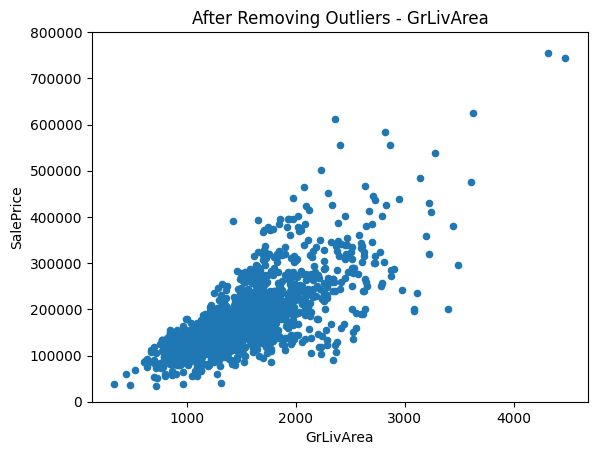

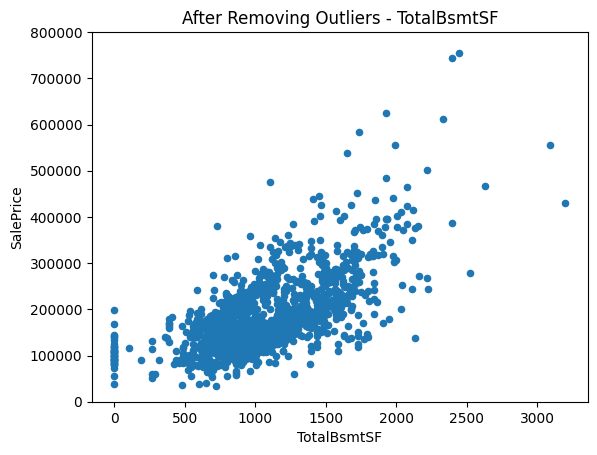

Wartość dolnego ograniczenia (lower bound): 11.025703565640743
Wartość górnego ograniczenia (upper bound): 13.022547931021936
Rozmiar ramki danych po usunięciu outlierów: (1428, 222)


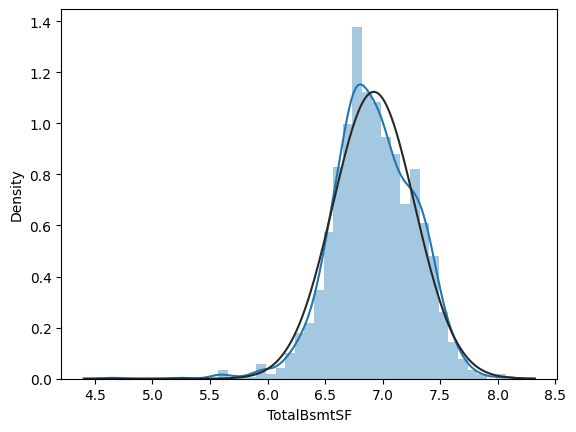

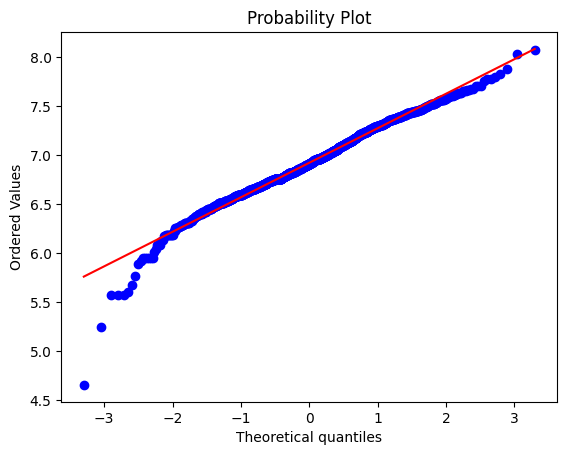

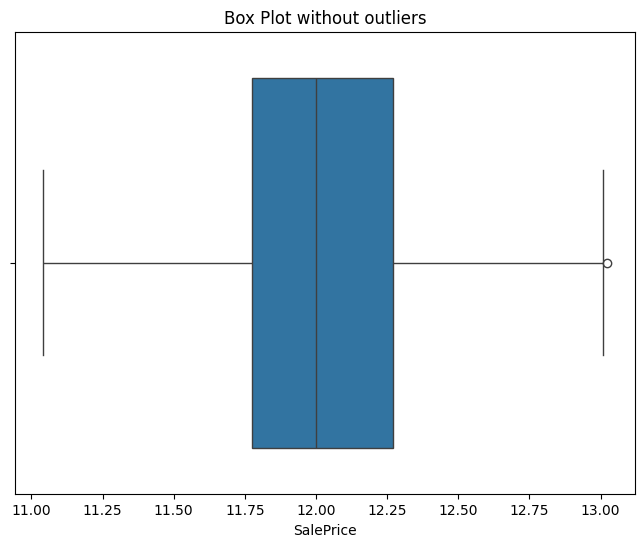

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train = pd.read_csv('train.csv')

#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

# Deleting points for GrLivArea
outliers_grlivarea = df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000)].index
df_train = df_train.drop(outliers_grlivarea)

var = 'GrLivArea'
# Scatter plot after removing outliers for GrLivArea
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000));
plt.title('After Removing Outliers - GrLivArea');

var2 = 'TotalBsmtSF'
# Deleting points for TotalBsmtSF
outliers_totalbsmtsf = df_train[(df_train['TotalBsmtSF'] > 3000) & (df_train['SalePrice'] < 300000)].index
df_train = df_train.drop(outliers_totalbsmtsf)

# Scatter plot after removing outliers for TotalBsmtSF
data = pd.concat([df_train['SalePrice'], df_train[var2]], axis=1)
data.plot.scatter(x=var2, y='SalePrice', ylim=(0, 800000));
plt.title('After Removing Outliers - TotalBsmtSF');

plt.show()

#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_train

# Zidentyfikuj outliery na podstawie box plot
Q1 = df_train['SalePrice'].quantile(0.25)
Q3 = df_train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Wyświetl wartości lower i upper bound
print("Wartość dolnego ograniczenia (lower bound):", lower_bound)
print("Wartość górnego ograniczenia (upper bound):", upper_bound)

# Usuń outliery
df_train = df_train.loc[(df_train['SalePrice'] >= lower_bound) & (df_train['SalePrice'] <= upper_bound)]
print("Rozmiar ramki danych po usunięciu outlierów:", df_train.shape)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train['SalePrice'])
plt.title('Box Plot without outliers')
plt.show()


SalePrice - zmienna zależna y, GrLivArea - zmienna niezależna X

In [58]:
data_livin = df_train[['GrLivArea', 'SalePrice']]
# Usuwanie wierszy zawierających brakujące wartości
data_livin = data_livin.dropna()

model_livin = ols('SalePrice ~ GrLivArea', data=data_livin)
res_livin = model_livin.fit()
res_livin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1509.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          9.04e-226
Time:                        16:11:53   Log-Likelihood:                -72.167
No. Observations:                1428   AIC:                             148.3
Df Residuals:                    1426   BIC:                             158.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0278      0.155     39.004      0.000       5.725       6.331
GrLivArea      0.8255      0.021     38.845      0.000       0.784       0.867
==============================================================================
Omnibus:                       41.440   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.747
Skew:                          -0.360   Prob(JB):                     2.60e-11
Kurtosis:                       3.550   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

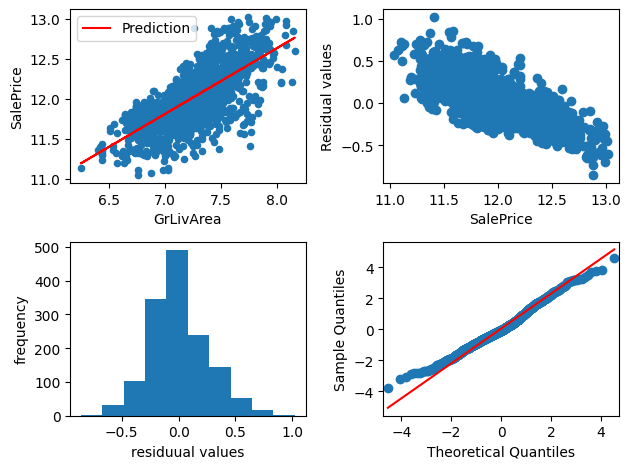

In [59]:
import statsmodels.graphics.gofplots as sm
import matplotlib.pyplot as plt 
from scipy import stats

fig, axs = plt.subplots(2,2, squeeze=False)
data_livin['Prediction'] = res_livin.predict(data_livin)
plt.tight_layout()

ax = data_livin.plot.scatter(x='GrLivArea',y='SalePrice', ax=axs[0,0])
data_livin.plot(x='GrLivArea',y='Prediction', ax=axs[0,0], color='red')
# plt.subplot(2,2,2)
residuals = res_livin.predict(data_livin)-data_livin['SalePrice']
axs[0,1].scatter(data_livin['SalePrice'], (residuals))
axs[0,1].set_xlabel('SalePrice')
axs[0,1].set_ylabel('Residual values')

axs[1,0].hist(residuals)
axs[1,0].set_ylabel('frequency')
axs[1,0].set_xlabel('residuual values')
plt.subplot(2,2,4)
sm.qqplot(residuals, stats.t, distargs=(4,), loc=3, scale=10, fit=True, ax=axs[1,1], line='s')
plt.tight_layout()

In [47]:
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


# Zadanie 2
Spróbuj postępując zgodnie z przedstawioną metodą wyznaczyć model dla relacji między ceną sprzedaży nieruchomości (SalePrice) a OverallQual 3.

In [60]:
data_overall = df_train[['OverallQual', 'SalePrice']]
# Usuwanie wierszy zawierających brakujące wartości
data_overall = data_overall.dropna()

model_overall = ols('SalePrice ~ OverallQual', data=data_overall)
res_overall = model_overall.fit()
res_overall.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2638.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:12:00   Log-Likelihood:                 160.21
No. Observations:                1428   AIC:                            -316.4
Df Residuals:                    1426   BIC:                            -305.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.6560      0.027    390.769      0.000      10.603      10.710
OverallQual     0.2247      0.004     51.361      0.000       0.216       0.233
==============================================================================
Omnibus:                       38.068   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.402
Skew:                          -0.261   Prob(JB):                     5.66e-13
Kurtosis:                       3.822   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Zadanie 3
Spróbuj wyznaczyć model który jest połączeniem modelu 1 i 2 oraz dodatkowo zawiera dane dotyczące i TotalBsmtSF (model powinien być sumą etykiet poszczególnych kolumn)

In [63]:
data_combined = df_train[['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'SalePrice']]
data_combined = data_combined.dropna()
model_combined = ols('SalePrice ~ GrLivArea + OverallQual + TotalBsmtSF', data=data_combined)
res_combined = model_combined.fit()
print(res_combined.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1498.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:12:17   Log-Likelihood:                 429.52
No. Observations:                1428   AIC:                            -851.0
Df Residuals:                    1424   BIC:                            -830.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.6283      0.122     62.636      

# Zadanie 4
Dla każdego modelu oceń jak zmienia się wariancji wartości residuów oraz statystyki. Czy model 3 dał istotną poprawę jakości dopasowanie, zmniejszył wariancję?

In [64]:
# Poszczególne statystyki dla modelu GrLivArea
print("Model 1 - GrLivArea:")
print(f"R-squared: {res_livin.rsquared}")
print(f"Residual Standard Error: {res_livin.mse_resid**0.5}")  # Pierwiastek z MSE reszt
print(f"F-statistic: {res_livin.fvalue}")

print("\n")

# Poszczególne statystyki dla modelu OverallQual
print("Model 2 - OverallQual:")
print(f"R-squared: {res_overall.rsquared}")
print(f"Residual Standard Error: {res_overall.mse_resid**0.5}")
print(f"F-statistic: {res_overall.fvalue}")

print("\n")

# Poszczególne statystyki dla modelu 3 - GrLivArea + OverallQual + TotalBsmtSF
print("Model 3 - GrLivArea + OverallQual + TotalBsmtSF:")
print(f"R-squared: {res_combined.rsquared}")
print(f"Residual Standard Error: {res_combined.mse_resid**0.5}")
print(f"F-statistic: {res_combined.fvalue}")

Model 1 - GrLivArea:
R-squared: 0.5141323569891298
Residual Standard Error: 0.2546919032052252
F-statistic: 1508.9556829165028


Model 2 - OverallQual:
R-squared: 0.6491091406315159
Residual Standard Error: 0.2164423185347112
F-statistic: 2637.941712720712


Model 3 - GrLivArea + OverallQual + TotalBsmtSF:
R-squared: 0.7593607463443666
Residual Standard Error: 0.17936766477050137
F-statistic: 1497.8571816076387


# Wnioski do zadania 4:
Wartości R-kwadrat bliżej 1 wskazują na lepsze dopasowanie modelu do danych - model 3 dał poprawę tj. wartość R-squared dla modelu 3 (GrLivArea + OverallQual + TotalBsmtSF) jest najbardziej zbliżona do 1. 
Residual Standard Error jest najniższe dla modelu 3, co świadczy o poprawie - niższa wartość Residual Standard Error oznacza lepszą dokładność przewidywań modelu. 
F-statistic najwyższe jest dla modelu 2 - ten model jest statystycznie istotny. To oznacza, że co najmniej jedna zmienna niezależna (OverallQual) ma statystycznie istotny wpływ na zmienną zależną (SalePrice).
Dodanie dodatkowych zmiennych poskutkowało poprawą jakości dopasowania modelu.

Testy omnibus (Omnibus(Prob)) wynoszą zero - istnieje korelacja między ceną sprzedaży i resuddum, którą można wyjaśnić dodając dodatkową cechę lub operując istniejącymi cechami, dodając funkcję wykładniczą lub logarytmiczną np. 

# Poprawa modelu 1
Aby poprawić model pierwszy można usunąć współczynnik funkcji:

In [55]:
data_livin = df_train[['GrLivArea', 'SalePrice']]
# Usuwanie wierszy zawierających brakujące wartości
data_livin = data_livin.dropna()

model_livin = ols('SalePrice ~ GrLivArea-1', data=data_livin)
res_livin = model_livin.fit()
res_livin.summary()

# Poszczególne statystyki dla modelu GrLivArea
print("Model 1 - GrLivArea:")
print(f"R-squared: {res_livin.rsquared}")
print(f"Residual Standard Error: {res_livin.mse_resid**0.5}")  # Pierwiastek z MSE reszt
print(f"F-statistic: {res_livin.fvalue}")

Model 1 - GrLivArea:
R-squared: 0.9990750302932198
Residual Standard Error: 0.36602816823368606
F-statistic: 1541326.2269864888


Wówczas R-squared wynosi 0.999, co oznacza najlepsze dopasowanie modelu do danych porównując poprzednie modele 2 oraz 3 z poprawionym modelem 1.

# Poprawa modelu 3
Aby uzyskać lepsze R-squared dla modelu 3:

In [67]:
data_combined = df_train[['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'SalePrice']]
data_combined = data_combined.dropna()
model_combined = ols('SalePrice ~ GrLivArea-1 + OverallQual + TotalBsmtSF', data=data_combined)
res_combined = model_combined.fit()
print(res_combined.summary())

print("Model 3 - GrLivArea + OverallQual + TotalBsmtSF:")
print(f"R-squared: {res_combined.rsquared}")
print(f"Residual Standard Error: {res_combined.mse_resid**0.5}")
print(f"F-statistic: {res_combined.fvalue}")

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.702e+05
Date:                Wed, 13 Dec 2023   Prob (F-statistic):                        0.00
Time:                        16:14:25   Log-Likelihood:                         -515.19
No. Observations:                1428   AIC:                                      1036.
Df Residuals:                    1425   BIC:                                      1052.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Wówczas wyniki dla modelu 3 prezentują się następująco:

R-squared: 0.9991676653688941
Residual Standard Error: 0.34745958005240674
F-statistic: 570208.931976872

i są najlepszymi uzyskanymi porównując model 1 poprawiony, model 2 oraz model 3 poprawiony - ten. 

# Zadanie 5
Na podstawie własnej analizy z poprzednich zajęć wybierz 4 cechy, które twoim zdaniem będą najlepiej reprezentowały cenę i stosując metodę z poprzednich zajęć (las drzew) spróbuj ocenić dokładność regresji w porównaniu z wynikami modeli 1,2,3. W tym celu wyznacz wartość R2 (do tego celu możesz wykorzystać from sklearn.metrics import r2_score, lub zaimplementować odpowiednie wyrażenie zgodnie ze wzorem)


In [51]:
import ppscore as pps

pps_matrix = pps.matrix(df_train)


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

selected_features = ['2ndFlrSF', 'GrLivArea', 'HalfBath', 'OverallQual']

# Train and test sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    df_train[selected_features], df_train['SalePrice'], test_size=0.2, random_state=42
)
# print(X_train_selected.columns)

numerical_transformer = StandardScaler()

# Preprocessing numerical data
preprocessor_selected = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, selected_features)
    ])

rf_model_selected = RandomForestRegressor(random_state=42)

# Appling preprocessing and apllying model
pipeline_selected = Pipeline(steps=[('preprocessor', preprocessor_selected),
                                      ('model', rf_model_selected)])

pipeline_selected.fit(X_train_selected, y_train_selected)
y_pred_selected = pipeline_selected.predict(X_test_selected)

# Metrics
r2_selected = r2_score(y_test_selected, y_pred_selected)
mse_selected = mean_squared_error(y_test_selected, y_pred_selected)

print(f'R-squared for manually selected features: {r2_selected}')
print(f'Mean Squared Error for manually selected features: {mse_selected}')


R-squared for manually selected features: 0.6960790518625084
Mean Squared Error for manually selected features: 0.0381417187208945


Ocena dokładności regresji w porównaniu z wynikami modeli 1,2,3:

Porównanie z modelem 1: poprawa dopasowania modelu do danych względem modelu 1 tj. R-squared bliższe jedności. \
Porównanie z modelem 2: poprawa dopasowania modelu do danych względem modelu 1 tj. R-squared bliższe jedności. \
Porównanie z modelem 3: lekko gorsze dopasowanie modelu do danych względem modelu 3 (niższe R-squared), jednak nieznacząco, gdyż różnica jest na poziomie około 0,0632. 

Błąd średniokwadratowy MSE na poziomie około 0,0381, oznacza małą różnicę do kwadratu między wartością przewidywaną a rzeczywistą, której spodziewamy się średnio. 